In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [3]:
master_movie = pd.read_csv('data/master_movie.csv', index_col=0)
master_movie.head()

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,genres,averagerating,numvotes,category,name
0,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"Action,Adventure,Fantasy",6.6,447624,actor,Johnny Depp
1,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"Action,Adventure,Fantasy",6.6,447624,actress,Penélope Cruz
2,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"Action,Adventure,Fantasy",6.6,447624,actor,Ian McShane
3,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"Action,Adventure,Fantasy",6.6,447624,actor,Geoffrey Rush
4,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"Action,Adventure,Fantasy",6.6,447624,director,Rob Marshall


In [4]:
genre_df = master_movie.copy()

In [5]:
genre_df.drop_duplicates(subset='movie_id', ignore_index=True, inplace=True)

In [6]:
genre_df.head()

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,genres,averagerating,numvotes,category,name
0,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"Action,Adventure,Fantasy",6.6,447624,actor,Johnny Depp
1,tt2395427,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,BV,"Action,Adventure,Sci-Fi",7.3,665594,producer,Kevin Feige
2,tt4154756,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,BV,"Action,Adventure,Sci-Fi",8.5,670926,actor,Robert Downey Jr.
3,tt0974015,2017-11-17,Justice League,300000000,229024295,655945209,WB,"Action,Adventure,Fantasy",6.5,329135,actor,Ben Affleck
4,tt2379713,2015-11-06,Spectre,300000000,200074175,879620923,Sony,"Action,Adventure,Thriller",6.8,352504,actor,Daniel Craig


In [7]:
genre_df[['genre_1', 'genre_2', 'genre_3']] = genre_df['genres'].str.split(',', expand=True)
genre_df.head()

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,genres,averagerating,numvotes,category,name,genre_1,genre_2,genre_3
0,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"Action,Adventure,Fantasy",6.6,447624,actor,Johnny Depp,Action,Adventure,Fantasy
1,tt2395427,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,BV,"Action,Adventure,Sci-Fi",7.3,665594,producer,Kevin Feige,Action,Adventure,Sci-Fi
2,tt4154756,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,BV,"Action,Adventure,Sci-Fi",8.5,670926,actor,Robert Downey Jr.,Action,Adventure,Sci-Fi
3,tt0974015,2017-11-17,Justice League,300000000,229024295,655945209,WB,"Action,Adventure,Fantasy",6.5,329135,actor,Ben Affleck,Action,Adventure,Fantasy
4,tt2379713,2015-11-06,Spectre,300000000,200074175,879620923,Sony,"Action,Adventure,Thriller",6.8,352504,actor,Daniel Craig,Action,Adventure,Thriller


In [10]:
genre_df_cleaned = genre_df[['genre_1', 'genre_2', 'genre_3']].apply(pd.Series.value_counts)
genre_df_cleaned.head()

,genre_1,genre_2,genre_3
Action,375.0,NaN,NaN
Adventure,140.0,160.0,NaN
Animation,9.0,68.0,13.0
Biography,109.0,12.0,3.0
Comedy,256.0,111.0,83.0


In [11]:
#genre_df_cleaned = genre_df_cleaned.replace(np.nan, 0)
genre_df_cleaned = genre_df_cleaned.fillna(0)

In [12]:
genre_df_cleaned.head()

,genre_1,genre_2,genre_3
Action,375.0,0.0,0.0
Adventure,140.0,160.0,0.0
Animation,9.0,68.0,13.0
Biography,109.0,12.0,3.0
Comedy,256.0,111.0,83.0


In [13]:
genre_df_cleaned['total_column'] = genre_df_cleaned.sum(axis=1)

In [14]:
genre_df_cleaned

,genre_1,genre_2,genre_3,total_column
Action,375.0,0.0,0.0,375.0
Adventure,140.0,160.0,0.0,300.0
Animation,9.0,68.0,13.0,90.0
Biography,109.0,12.0,3.0,124.0
Comedy,256.0,111.0,83.0,450.0
Crime,71.0,88.0,43.0,202.0
Documentary,41.0,6.0,0.0,47.0
Drama,283.0,318.0,115.0,716.0
Family,4.0,32.0,39.0,75.0
Fantasy,5.0,43.0,55.0,103.0


In [15]:
genre_df_cleaned['total_column'].sort_values(ascending=False)

Drama          716.0
Comedy         450.0
Action         375.0
Adventure      300.0
Thriller       234.0
Crime          202.0
Romance        179.0
Horror         147.0
Biography      124.0
Sci-Fi         110.0
Mystery        109.0
Fantasy        103.0
Animation       90.0
Family          75.0
Documentary     47.0
History         44.0
Music           40.0
Sport           30.0
War             13.0
Western          8.0
Musical          6.0
Unknown          6.0
News             2.0
Name: total_column, dtype: float64

In [35]:
genre_df['ROI'] = ((genre_df['worldwide_gross'] - genre_df['production_budget']) / genre_df['production_budget']) * 100

In [38]:
genre_df.drop(['roi'], axis=1, inplace=True)

In [39]:
genre_df.head()

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,genres,averagerating,numvotes,category,name,genre_1,genre_2,genre_3,ROI
0,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"Action,Adventure,Fantasy",6.6,447624,actor,Johnny Depp,Action,Adventure,Fantasy,154.667286
1,tt2395427,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,BV,"Action,Adventure,Sci-Fi",7.3,665594,producer,Kevin Feige,Action,Adventure,Sci-Fi,324.384139
2,tt4154756,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,BV,"Action,Adventure,Sci-Fi",8.5,670926,actor,Robert Downey Jr.,Action,Adventure,Sci-Fi,582.711400
3,tt0974015,2017-11-17,Justice League,300000000,229024295,655945209,WB,"Action,Adventure,Fantasy",6.5,329135,actor,Ben Affleck,Action,Adventure,Fantasy,118.648403
4,tt2379713,2015-11-06,Spectre,300000000,200074175,879620923,Sony,"Action,Adventure,Thriller",6.8,352504,actor,Daniel Craig,Action,Adventure,Thriller,193.206974


In [19]:
action_ww_gross = genre_df[genre_df.isin(['Action']).any(axis=1)]

In [20]:
action_ww_gross['worldwide_gross'].sum()

96698477320

In [21]:
genre_list = ['Drama', 'Comedy', 'Action', 'Adventure', 'Thriller', 'Crime', 
              'Romance', 'Horror', 'Biography', 'Sci-Fi', 'Mystery', 'Fantasy', 
              'Animation', 'Family', 'Documentary', 'History', 'Music', 'Sport', 
              'War', 'Western', 'Musical', 'Unknown', 'News']

In [22]:
genre_ww_gross_df = genre_df[genre_df.isin(genre_list).any(axis = 1)]

In [23]:
genre_ww_gross_df.head()

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,genres,averagerating,numvotes,category,name,genre_1,genre_2,genre_3,roi
0,tt1298650,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,"Action,Adventure,Fantasy",6.6,447624,actor,Johnny Depp,Action,Adventure,Fantasy,154.667286
1,tt2395427,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,BV,"Action,Adventure,Sci-Fi",7.3,665594,producer,Kevin Feige,Action,Adventure,Sci-Fi,324.384139
2,tt4154756,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,BV,"Action,Adventure,Sci-Fi",8.5,670926,actor,Robert Downey Jr.,Action,Adventure,Sci-Fi,582.711400
3,tt0974015,2017-11-17,Justice League,300000000,229024295,655945209,WB,"Action,Adventure,Fantasy",6.5,329135,actor,Ben Affleck,Action,Adventure,Fantasy,118.648403
4,tt2379713,2015-11-06,Spectre,300000000,200074175,879620923,Sony,"Action,Adventure,Thriller",6.8,352504,actor,Daniel Craig,Action,Adventure,Thriller,193.206974


In [43]:
drama_ww_gross_df = genre_df[genre_df.isin(['Drama']).any(axis = 1)]
comedy_ww_gross_df = genre_df[genre_df.isin(['Comedy']).any(axis = 1)]
action_ww_gross_df = genre_df[genre_df.isin(['Action']).any(axis = 1)]
adventure_ww_gross_df = genre_df[genre_df.isin(['Adventure']).any(axis = 1)]
thriller_ww_gross_df = genre_df[genre_df.isin(['Thriller']).any(axis = 1)]
crime_ww_gross_df = genre_df[genre_df.isin(['Crime']).any(axis = 1)]
romance_ww_gross_df = genre_df[genre_df.isin(['Romance']).any(axis = 1)]
horror_ww_gross_df = genre_df[genre_df.isin(['Horror']).any(axis = 1)]
biography_ww_gross_df = genre_df[genre_df.isin(['Biography']).any(axis = 1)]
scifi_ww_gross_df = genre_df[genre_df.isin(['Sci-Fi']).any(axis = 1)]
mystery_ww_gross_df = genre_df[genre_df.isin(['Mystery']).any(axis = 1)]
fantasy_ww_gross_df = genre_df[genre_df.isin(['Fantasy']).any(axis = 1)]
animation_ww_gross_df = genre_df[genre_df.isin(['Animation']).any(axis = 1)]
family_ww_gross_df = genre_df[genre_df.isin(['Family']).any(axis = 1)]
documentary_ww_gross_df = genre_df[genre_df.isin(['Documentary']).any(axis = 1)]
history_ww_gross_df = genre_df[genre_df.isin(['History']).any(axis = 1)]
music_ww_gross_df = genre_df[genre_df.isin(['Music']).any(axis = 1)]
sport_ww_gross_df = genre_df[genre_df.isin(['Sport']).any(axis = 1)]
war_ww_gross_df = genre_df[genre_df.isin(['War']).any(axis = 1)]
western_ww_gross_df = genre_df[genre_df.isin(['Western']).any(axis = 1)]
musical_ww_gross_df = genre_df[genre_df.isin(['Musical']).any(axis = 1)]
unknown_ww_gross_df = genre_df[genre_df.isin(['Unknown']).any(axis = 1)]
news_ww_gross_df = genre_df[genre_df.isin(['News']).any(axis = 1)]

In [44]:
drama_ww_gross_df

,movie_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,genres,averagerating,numvotes,category,name,genre_1,genre_2,genre_3,ROI
23,tt0955308,2010-05-14,Robin Hood,210000000,105487148,322459006,Uni.,"Action,Adventure,Drama",6.6,239480,actor,Russell Crowe,Action,Adventure,Drama,53.551908
24,tt2363363,2010-05-14,Robin Hood,210000000,105487148,322459006,Uni.,"Action,Drama",6.3,78,actor,Ken Duken,Action,Drama,None,53.551908
50,tt1856101,2017-10-06,Blade Runner 2049,185000000,92054159,259357408,WB,"Drama,Mystery,Sci-Fi",8.0,376241,producer,Andrew A. Kosove,Drama,Mystery,Sci-Fi,40.193194
53,tt0918940,2016-07-01,The Legend of Tarzan,180000000,126643061,348902025,WB,"Action,Adventure,Drama",6.3,150154,producer,Tony Ludwig,Action,Adventure,Drama,93.834458
54,tt0970179,2011-11-23,Hugo,180000000,73864507,180047784,Par.,"Adventure,Drama,Family",7.5,284869,producer,Graham King,Adventure,Drama,Family,0.026547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,tt1549572,2011-07-22,Another Earth,175000,1321194,2102779,FoxS,"Drama,Romance,Sci-Fi",7.0,85839,actress,Brit Marling,Drama,Romance,Sci-Fi,1101.588000
1388,tt1748207,2012-04-27,Sound of My Voice,135000,408015,429448,FoxS,"Drama,Mystery,Sci-Fi",6.6,19387,actor,Christopher Denham,Drama,Mystery,Sci-Fi,218.109630
1389,tt1742336,2012-06-15,Your Sister's Sister,120000,1597486,3090593,IFC,"Comedy,Drama",6.7,24780,actor,Mark Duplass,Comedy,Drama,None,2475.494167
1391,tt6265828,2017-07-07,A Ghost Story,100000,1594798,2769782,A24,"Drama,Fantasy,Romance",6.8,46280,actor,Casey Affleck,Drama,Fantasy,Romance,2669.782000


In [45]:
drama_ww_gross_sum = drama_ww_gross_df['worldwide_gross'].sum()
comedy_ww_gross_sum = comedy_ww_gross_df['worldwide_gross'].sum()
action_ww_gross_sum = action_ww_gross_df['worldwide_gross'].sum()
adventure_ww_gross_sum = adventure_ww_gross_df['worldwide_gross'].sum()
thriller_ww_gross_sum = thriller_ww_gross_df['worldwide_gross'].sum()
crime_ww_gross_sum = crime_ww_gross_df['worldwide_gross'].sum()
romance_ww_gross_sum = romance_ww_gross_df['worldwide_gross'].sum()
horror_ww_gross_sum = horror_ww_gross_df['worldwide_gross'].sum()
biography_ww_gross_sum = biography_ww_gross_df['worldwide_gross'].sum()
scifi_ww_gross_sum = scifi_ww_gross_df['worldwide_gross'].sum()
mystery_ww_gross_sum = mystery_ww_gross_df['worldwide_gross'].sum()
fantasy_ww_gross_sum = fantasy_ww_gross_df['worldwide_gross'].sum()
animation_ww_gross_sum = animation_ww_gross_df['worldwide_gross'].sum()
family_ww_gross_sum = family_ww_gross_df['worldwide_gross'].sum()
documentary_ww_gross_sum = documentary_ww_gross_df['worldwide_gross'].sum()
history_ww_gross_sum = history_ww_gross_df['worldwide_gross'].sum()
music_ww_gross_sum = music_ww_gross_df['worldwide_gross'].sum()
sport_ww_gross_sum = sport_ww_gross_df['worldwide_gross'].sum()
war_ww_gross_sum = war_ww_gross_df['worldwide_gross'].sum()
western_ww_gross_sum = western_ww_gross_df['worldwide_gross'].sum()
musical_ww_gross_sum = musical_ww_gross_df['worldwide_gross'].sum()
unknown_ww_gross_sum = unknown_ww_gross_df['worldwide_gross'].sum()
news_ww_gross_sum = news_ww_gross_df['worldwide_gross'].sum()

In [46]:
genre_gross_sum = [drama_ww_gross_sum, comedy_ww_gross_sum, action_ww_gross_sum, adventure_ww_gross_sum, thriller_ww_gross_sum, 
                   crime_ww_gross_sum, romance_ww_gross_sum, horror_ww_gross_sum, biography_ww_gross_sum, scifi_ww_gross_sum, mystery_ww_gross_sum, 
                   fantasy_ww_gross_sum, animation_ww_gross_sum, family_ww_gross_sum, documentary_ww_gross_sum, history_ww_gross_sum, music_ww_gross_sum, 
                   sport_ww_gross_sum, war_ww_gross_sum, western_ww_gross_sum, musical_ww_gross_sum, unknown_ww_gross_sum, news_ww_gross_sum]


In [47]:
genre_gross_sum

[58114916679,
 65871392557,
 96698477320,
 109816783813,
 30688295247,
 18638989901,
 13475031372,
 13662960480,
 11376622495,
 40057846557,
 10572535989,
 23871553664,
 36271049858,
 12873273622,
 5581054141,
 4574050011,
 3356569359,
 4095198599,
 492058723,
 985817842,
 864270165,
 1103136217,
 63315653]

In [48]:
genre_tuples = list(zip(genre_list, genre_gross_sum))

In [49]:
axis_rev = pd.DataFrame(genre_tuples, columns = ['genre', 'worldwide_gross_revenue'])

<ipython-input-50-13a57c081d31>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(labels = ylabels)


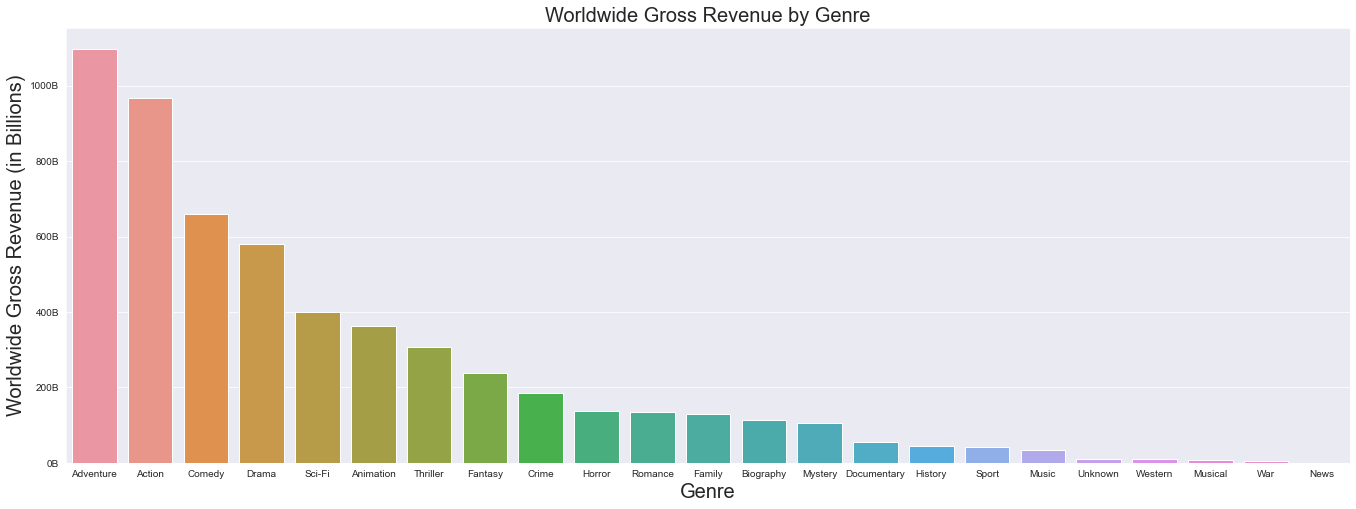

In [50]:
ylabels = ['0B', '200B', '400B', '600B', '800B', '1000B']

sns.set_style('darkgrid')
plt.figure(figsize = (23,8))
plt.ticklabel_format(style='plain')
g = sns.barplot(x = 'genre', 
            y =  'worldwide_gross_revenue', 
            data = axis_rev, 
            order = axis_rev.sort_values('worldwide_gross_revenue', ascending = False).genre)

#set labels
g.set_yticklabels(labels = ylabels)
plt.xlabel('Genre', size = 20)
plt.ylabel('Worldwide Gross Revenue (in Billions)', size = 20)
plt.title('Worldwide Gross Revenue by Genre', size = 20)
plt.show()

In [52]:
drama_ww_gross_df['ROI'].mean()

276.1597787125269

In [54]:
drama_ROI_mean = drama_ww_gross_df['ROI'].mean()
comedy_ROI_mean = comedy_ww_gross_df['ROI'].mean()
action_ROI_mean = action_ww_gross_df['ROI'].mean()
adventure_ROI_mean = adventure_ww_gross_df['ROI'].mean()
thriller_ROI_mean = thriller_ww_gross_df['ROI'].mean()
crime_ROI_mean = crime_ww_gross_df['ROI'].mean()
romance_ROI_mean = romance_ww_gross_df['ROI'].mean()
horror_ROI_mean = horror_ww_gross_df['ROI'].mean()
biography_ROI_mean = biography_ww_gross_df['ROI'].mean()
scifi_ROI_mean = scifi_ww_gross_df['ROI'].mean()
mystery_ROI_mean = mystery_ww_gross_df['ROI'].mean()
fantasy_ROI_mean = fantasy_ww_gross_df['ROI'].mean()
animation_ROI_mean = animation_ww_gross_df['ROI'].mean()
family_ROI_mean = family_ww_gross_df['ROI'].mean()
documentary_ROI_mean = documentary_ww_gross_df['ROI'].mean()
history_ROI_mean = history_ww_gross_df['ROI'].mean()
music_ROI_mean = music_ww_gross_df['ROI'].mean()
sport_ROI_mean = sport_ww_gross_df['ROI'].mean()
war_ROI_mean = war_ww_gross_df['ROI'].mean()
western_ROI_mean = western_ww_gross_df['ROI'].mean()
musical_ROI_mean = musical_ww_gross_df['ROI'].mean()
unknown_ROI_mean = unknown_ww_gross_df['ROI'].mean()
news_ROI_mean = news_ww_gross_df['ROI'].mean()

In [56]:
genres_ROI_mean = [drama_ROI_mean, comedy_ROI_mean, action_ROI_mean, adventure_ROI_mean, 
                   thriller_ROI_mean, crime_ROI_mean, romance_ROI_mean, horror_ROI_mean, 
                   biography_ROI_mean, scifi_ROI_mean, mystery_ROI_mean, fantasy_ROI_mean, 
                   animation_ROI_mean, family_ROI_mean, documentary_ROI_mean, history_ROI_mean, 
                   music_ROI_mean, sport_ROI_mean, war_ROI_mean, western_ROI_mean, 
                   musical_ROI_mean, unknown_ROI_mean, news_ROI_mean]

In [57]:
list_of_ROI_mean = list(zip(genre_list, genres_ROI_mean))

In [59]:
df_ROI_mean = pd.DataFrame(list_of_ROI_mean, columns = ['genres', 'genre_ROI_mean'])

In [62]:
df_ROI_mean.sort_values(by = 'genre_ROI_mean', ascending= False)
df_ROI_mean.head()

,genres,genre_ROI_mean
7,Horror,1162.623767
10,Mystery,1123.750202
4,Thriller,682.898122
17,Sport,504.711882
6,Romance,351.176392
